# はじめに
こんにちは！Rejouiでお仕事をさせてもらっている、大学生の柳（やなぎ）です。

今回はRejouiでのお仕事を体験するということで、Pythonを使って川崎フロンターレの強さを分析するお仕事にチャレンジします！  

途中、難しい内容があるかもしれませんが、気軽に私たちに質問してください！

# ライブラリのインポート
pythonには、さまざまな機能を備えた「ライブラリ」というものがあります。

これは目的に合わせて使う機能を1つにまとめたもので、インストール後「import 〇〇」と入力することで使用することができるようになります。

今回は以下のライブラリを使用するので、もしインストールされていない場合はお父さんに聞きながらインストールしてください！  
（以下にjapanize-matplotlibとpandasのインストールコードを書いておくので、必要であれば実行してください。ちなみに、japanize-matplotlibをインストールすると同時にmatplotlibとnumpyもインストールされるのでこの2つのインストールでこの後のコードは動くと思います。）

*   japanize-matplotlib
*   matplotlib
*   pandas
*   numpy

In [4]:
!pip install japanize-matplotlib

  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.6
    Uninstalling pyparsing-3.0.6:
      Successfully uninstalled pyparsing-3.0.6


In [5]:
!pip install pandas

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

plt.rcParams["figure.figsize"] = [10,6] #表示されるグラフの大きさを調整
plt.rcParams["font.size"] = 16 #グラフ内の文字の大きさを決める

まずは、今回使用するデータをダウンロードします。  
データをpythonで使えるようにするには、データを読み込む必要があります。今回は、pandasのread_csvという機能を使ってみます。

In [7]:
#ここはパスを直して格納する！
ranking = pd.read_csv('順位表.csv')
transition = pd.read_csv('順位の変化.csv')

読み込んだデータを見てみましょう。

今回は、順位表のデータを「ranking」という変数に代入したので、「ranking」と打つことでデータを呼び出すことができます。

In [8]:
ranking

,順位,チーム名,勝点,試合数,勝,分,敗,得点,失点,得失,平均勝点,平均得点,平均失点
0,1,川崎フロンターレ川崎Ｆ,85,35,26,7,2,72,25,47,2.43,2.1,0.7
1,2,横浜Ｆ・マリノス横浜FM,75,35,23,6,6,78,32,46,2.14,2.2,0.9
2,3,ヴィッセル神戸神戸,67,35,19,10,6,58,34,24,1.91,1.7,1.0
3,4,鹿島アントラーズ鹿島,62,35,19,5,11,60,36,24,1.77,1.7,1.0
4,5,名古屋グランパス名古屋,62,35,18,8,9,40,27,13,1.77,1.1,0.8
5,6,浦和レッズ浦和,59,35,17,8,10,43,36,7,1.69,1.2,1.0
6,7,サガン鳥栖鳥栖,56,35,15,11,9,42,32,10,1.60,1.2,0.9
7,8,アビスパ福岡福岡,51,35,14,9,12,40,35,5,1.46,1.1,1.0
8,9,ＦＣ東京FC東京,49,35,14,7,14,47,50,-3,1.40,1.3,1.4
9,10,サンフレッチェ広島広島,46,35,11,13,11,39,37,2,1.31,1.1,1.1


順位表を見ると、川崎フロンターレが1位なことがわかります。

サッカーの順位は勝ち点で決まりますが、川崎フロンターレが2位に10点差をつけていますね。たった2試合しか負けていないのも驚きです。

次に、上位3チームの順位の変化データが入っている「transition」を呼び出してみましょう。

In [9]:
transition

,消化試合数,川崎フロンターレ,横浜FM,神戸
0,1,2,19,6
1,2,1,17,6
2,3,2,11,4
3,4,1,4,5
4,5,1,4,8
5,6,2,6,8
6,7,1,4,5
7,8,1,6,3
8,9,1,3,4
9,10,1,3,4


ここには、何試合行ったかとその時のチームの順位が入っています。

では、早速これらを使って可視化をしてみましょう！

# 順位の推移を折れ線グラフにしてみよう！
まず、transitionデータを使って、各チームの順位の変化を折れ線グラフにしてみましょう！

折れ線グラフの書き方  
plt.plot(横軸の値, 縦軸の値, data=使用するデータ, label=線につける名前)

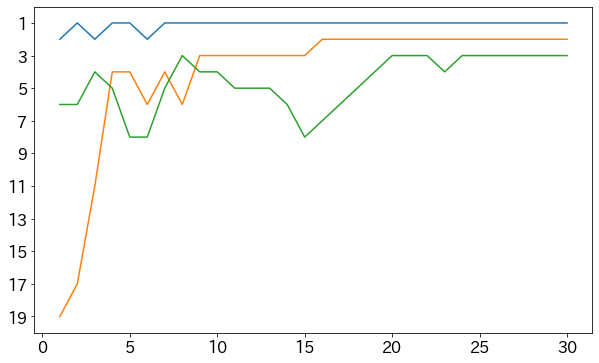

In [10]:
#折れ線グラフを書く（3チーム分）
#書き方：plt.plot(横軸の値, 縦軸の値, data=使用するデータ, label=線につける名前)
plt.plot('消化試合数', '川崎フロンターレ', data=transition, label='川崎フロンターレ')
plt.plot('消化試合数', '横浜FM', data=transition, label='横浜FM')
plt.plot('消化試合数', '神戸', data=transition, label='神戸')

#ここは見た目の調整です！気になったら何をしているか調べてみてね。
plt.ylim(20, 0) #yの軸を逆さまにする
plt.yticks(np.arange(19, -1, -2)) #目盛りを自分で決める

#グラフの表示
plt.show()

順位の変化が出てきましたが、このグラフには1つ問題があります。それはどこでしょうか？？

**そうです、どの線がどのチームなのか、これだけではわからないのです。**


そのため、少しコードを変えて線の区別をグラフ内に表示できるようにしましょう！

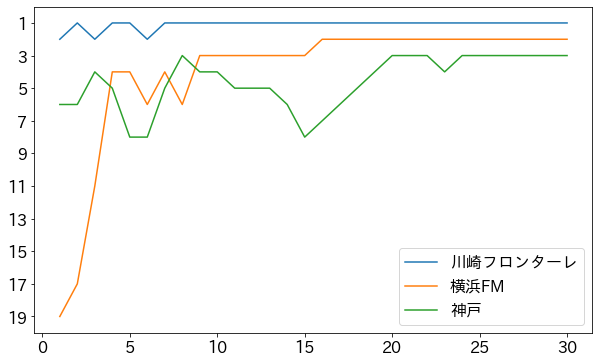

In [11]:
#折れ線グラフを書く（3チーム分）
#書き方：plt.plot(横軸の値, 縦軸の値, data=使用するデータ, label=線につける名前)
plt.plot('消化試合数', '川崎フロンターレ', data=transition, label='川崎フロンターレ')
plt.plot('消化試合数', '横浜FM', data=transition, label='横浜FM')
plt.plot('消化試合数', '神戸', data=transition, label='神戸')

#ここは見た目の調整です！気になったら何をしているか調べてみてね。
plt.ylim(20, 0) #yの軸を逆さまにする
plt.yticks(np.arange(19, -1, -2)) #目盛りを自分で決める

#さっきと違うところ！線につけている名前を表示できるようにします。
plt.legend()

#グラフの表示
plt.show()

plt.legend()を追加することで、線の区別ができるようになりましたね！

さて、この結果を見てみると川崎フロンターレは1位か2位しか取ったことがなく、ずっと上位にいることがわかります。

一方で、神戸や横浜FMは

# 勝点で棒グラフを書いてみよう！
まず、順位表の勝点を棒グラフにしてみましょう！

横軸に順位、縦軸に勝点をとった棒グラフを作成します。

棒グラフの書き方  
plt.bar(x=横軸のデータ, height=棒の長さを決めるデータ, data=使用するデータ)

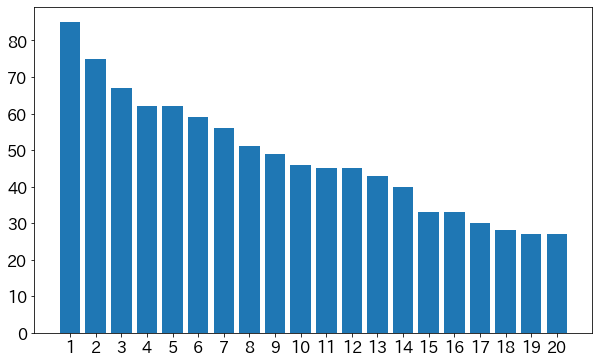

In [12]:
#棒グラフを書く
#書き方：plt.bar(x=横軸のデータ, height=棒の長さを決めるデータ, data=使用するデータ)
plt.bar(x='順位', height='勝点', tick_label='順位', data=ranking)

#グラフの表示
plt.show()

順位通りに並んでいるので、当たり前ですが右に行くほど勝点が減っていきます！

また、真ん中あたりの順位は勝点があまり変わらないものの、1位と2位は少し飛び抜けているようです。

次は、各チームの勝ち数を棒グラフにしてみます。先程のコードにて、「height = 」の部分を「**勝点⇒勝**」に変更してみましょう。

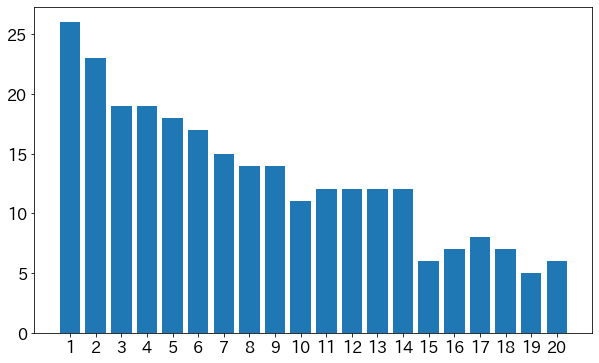

In [13]:
#棒グラフを書く
#書き方：plt.bar(x=横軸のデータ, height=棒の長さを決めるデータ, data=使用するデータ)
plt.bar(x='順位', height='勝', tick_label='順位', data=ranking)

#グラフの表示
plt.show()

勝ち数の棒グラフは勝点の棒グラフと形が似ていますね。

また、10位と11位では10位のほうが勝ち数が少ないのに、勝点は変わらないようです。

これは、**引き分けで勝点1がもらえる**ことが関係しています。  
勝ち数が少なくても、引き分けが多いチームは1点をたくさんもらえるので、負けないこともサッカーにおいては大切です。

試しに、引き分け数を棒グラフにしてみましょう。

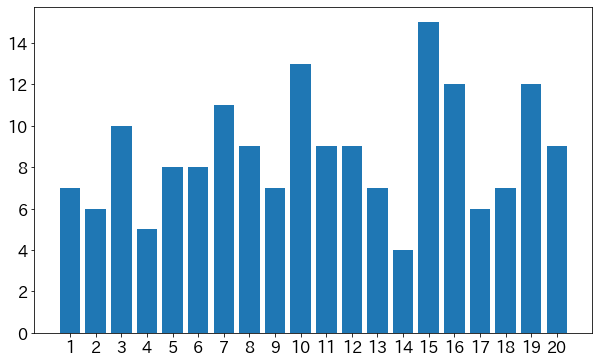

In [14]:
#棒グラフを書く
#書き方：plt.bar(x=横軸のデータ, height=棒の長さを決めるデータ, data=使用するデータ)
plt.bar(x='順位', height='分', tick_label='順位', data=ranking)

#グラフの表示
plt.show()

10位は11位よりも引き分けがかなり多く、それによって同じ勝点になっていることがわかりました！

# 試合結果を円グラフにしてみよう！
次に、川崎フロンターレはどれくらい勝っていて、どれくらい負けているのかを数値で可視化してみましょう。

割合を見るには円グラフが有効です。川崎フロンターレの試合結果を上の順位表から見ると、勝ちが26試合、負けが2試合、引き分けが7試合となっています。これを円グラフにしてみましょう。

円グラフの書き方  
plt.pie(円グラフにしたいデータ)

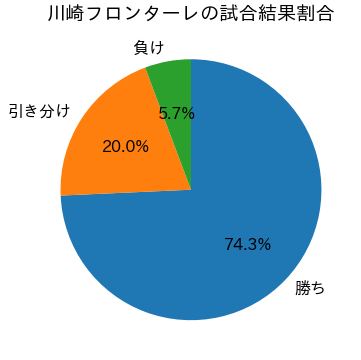

In [15]:
#円グラフを書く
#書く前にちょっと準備
result_flontale = np.array([26, 7, 2]) #勝ち、引き分け、負けの試合数
label = ['勝ち', '引き分け', '負け'] #勝ち、引き分け、負けの区別をつけるために、文字を用意しておく

#実際に円グラフを作る
#書き方：plt.pie(円グラフにしたいデータ)
plt.pie(result_flontale, labels=label, startangle=90, counterclock=False, autopct="%1.1f%%")

#グラフにタイトルをつけよう（これは他のグラフでも使えるよ！）
plt.title('川崎フロンターレの試合結果割合') 

#グラフの表示
plt.show()

円グラフを見ると、川崎フロンターレは全試合中約74%に勝っています！

川崎フロンターレは去年も2位に18点差をつけて優勝していますが、その時の戦績は「34試合26勝5分3敗」でした。
去年とほぼ同じ数値ということで、今年になって急に強くなったということではなさそうです。


# 散布図を書いてみよう！
先ほど読み込んだ順位表を使って、散布図を書いてみましょう！


まず、順位表を見た時、「**順位が上のチームほど強いので、ゴールの数が多いのではないか？**」という仮説がたてられそうです。

これを散布図を使って確認してみます。

散布図の書き方  
plt.scatter(x=横軸の値, y=縦軸の値, data=使用するデータ)

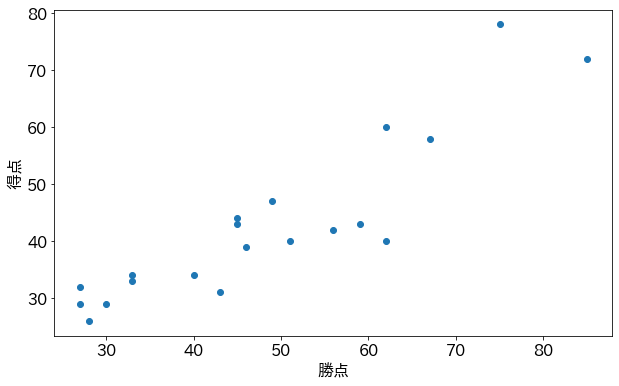

In [16]:
#散布図を書く
#書き方：plt.scatter(x=横軸の値, y=縦軸の値, data=使用するデータ)
plt.scatter(x='勝点', y='得点', data=ranking)

#軸に名前をつける
plt.xlabel('勝点')
plt.ylabel('得点')

#散布図の表示
plt.show()

散布図を見ると、右に行くほど点が上にあることがわかります。

ここから「**勝点が多いチームは得点数も多い**」という仮説はどうやら正しそうだと読み取れます。当たり前のことかもしれませんが、ちゃんとデータを可視化してみることで関係が一目でわかりますね！

今度は逆に、「**強いチームほど守りが固く、失点が少ないのではないか？**」という仮説を確かめてみましょう。

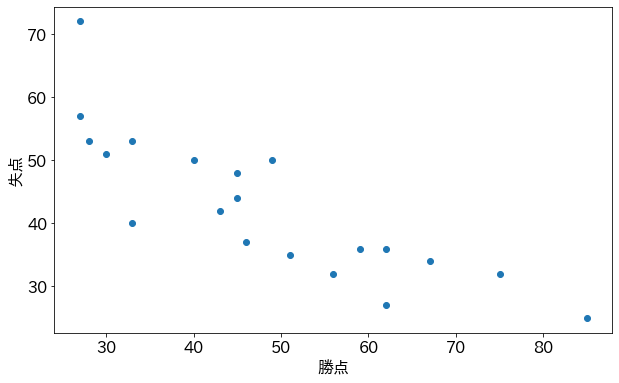

In [17]:
#散布図を書く
#書き方：plt.scatter(x=横軸の値, y=縦軸の値, data=使用するデータ)
plt.scatter(x='勝点', y='失点', data=ranking)

#軸に名前をつける
plt.xlabel('勝点')
plt.ylabel('失点')

#散布図の表示
plt.show()

先ほどとは逆に、右に行けば行くほど点が下の方に打たれています。ここから、「強いチームは失点が少ない」ということがわかります。

さて、ここで散布図の川崎フロンターレの点はどこにあるでしょうか？？  

川崎フロンターレは一位のチームなので、この散布図では一番右側にある点になります。

これをみると、**川崎フロンターレは得点数が2位で失点の少なさは1位**であることがわかり、「**川崎フロンターレは攻撃・守備ともにリーグトップクラスである**」ことが言えます。

お疲れ様でした！

ここまで読んだとあくんは、pythonで基本的なグラフを作ることができるようになっています。

他にも、自分の好きなテーマでデータを集めて、可視化を楽しんでくださいね。

# チャレンジ
ここから下は、とあくんが実際にコードを書いて可視化をやってみる番です！

今までのデータとは別に、2つの新たなデータを用意しました。

2つのデータの名前を「teamscore」「chancepoint」として、中身を見てみましょう。

In [18]:
teamscore = pd.read_csv('チーム指数.csv')
chancepoint = pd.read_csv('チャンスポイント.csv')

teamscoreデータは、各チームのスタイルを数値化したものです。

例えば、左サイド攻撃という数値が高ければ、そのチームはコートの左サイドから攻撃を仕掛ける回数が多いということです。

In [19]:
teamscore

,チーム名,順位,攻撃セットプレー,左サイド攻撃,中央攻撃,右サイド攻撃,ショートカウンター,ロングカウンター,敵陣ポゼッション,自陣ポゼッション
0,川崎Ｆ,1,55,70,61,52,63,46,72,48
1,横浜FM,2,60,77,54,82,59,53,69,56
2,神戸,3,41,52,48,41,42,36,60,64
3,鹿島,4,70,51,67,56,65,68,49,36
4,名古屋,5,56,57,39,45,50,45,45,48
5,浦和,6,45,49,53,40,45,43,56,63
6,鳥栖,7,46,50,50,50,42,40,58,65
7,福岡,8,46,41,52,47,58,51,32,33
8,FC東京,9,63,60,47,38,57,62,41,39
9,広島,10,54,57,50,61,59,58,55,44


次に、chancepointというデータについて説明します。

これは、**各チームがどのような場面からチャンスを作ったか、または　相手のチャンスを奪ったか**という数値です。

例えば、守備ポイントが高いチームは「相手チームの得点チャンスでよく攻撃を防いでいる」ということになります。

また、攻撃ポイントが高い時はパス、ドリブルなどがチャンスに結びついていることが多いということを表しています。

In [20]:
chancepoint

,チーム名,攻撃ポイント,守備ポイント,奪取ポイント,順位,勝点,得点,失点
0,川崎フロンターレ川崎Ｆ,744.44,425.99,3831.97,1,85,72,25
1,横浜Ｆ・マリノス横浜FM,758.44,384.00,3456.56,2,75,78,32
2,ヴィッセル神戸神戸,520.91,493.02,3332.13,3,67,58,34
3,鹿島アントラーズ鹿島,528.94,440.02,3408.93,4,62,60,36
4,名古屋グランパス名古屋,458.63,465.09,3199.22,5,62,40,27
5,浦和レッズ浦和,533.77,467.95,3168.78,6,59,43,36
6,サガン鳥栖鳥栖,532.31,472.59,3130.73,7,56,42,32
7,アビスパ福岡福岡,379.00,536.89,3423.94,8,51,40,35
8,ＦＣ東京FC東京,469.43,482.08,3069.28,9,49,47,50
9,サンフレッチェ広島広島,554.88,470.35,3313.89,10,46,39,37


さあ、ここからはとあくんが自分でこの2つのデータを可視化してみて、川崎フロンターレの強さを分析してみましょう！

わからないことがあれば、いつでも私たちに質問してくださいね。